<img src="topo.jpeg" width="100%" />

# Segmentação de clientes usando K-Means para descobrir melhores variáveis para geração de receita

Criei esse projeto por curiosidade, gostaria de ter tido esse conhecimento quando tinha a agência para gerar mais valor e receita para meus clientes.

Gerei um dataset dummy com itens randômicos baseado em algumas listas com itens que pré-defini.

## Objetivo
Descobrir as variáveis de clientes que trazem mais receita para uma empresa usando o <strong>LTV</strong> como principal indicador.

## O que é LTV?

LTV é a sigla para Lifetime Value ou, em português, Valor do Ciclo de Vida do Cliente. Na prática, ele é o indicador que calcula a receita gerada por um determinado cliente durante seu tempo como cliente ativo da empresa. 

Os valores da LTV servem para guiar decisões e trazer insights sobre a saúde financeira do negócio e a atratividade de investimentos. Além de serem um importante termômetro sobre retenção e os níveis de satisfação do cliente — o que tem impacto direto nos resultados de qualquer empresa.

<p>Sua fórmula:</p>
<img src="ltv.png"/>

<a href="https://www.galateia.com.br/ltv-o-que-e-lifetime-value-e-qual-a-importancia-desse-indicador" target="_blank">Fonte</a>

## Importação de bibliotecas

In [1111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from matplotlib import colors
from matplotlib.colors import ListedColormap
sns.set_theme(style="ticks")

In [1112]:
def espacador():
    print("---" * 30)

In [1113]:
df = pd.read_csv('dados.csv')

In [1114]:
df.head()

,Unnamed: 0,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,Ticket_médio,Lifetime_Meses
0,0,Revista,Masculino,46,B2B,Jundiaí,TI,Média,Supervisor,Novo,7388.41968896,17
1,1,Revista,Feminino,34,B2B,Jundiaí,Marketing,Grande,Supervisor,Novo,14594.14620799,8
2,2,TV,Feminino,61,B2C,Belo Horizonte,TI,Pequena,Diretor,Novo,13799.75086117,11
3,3,Revista,Feminino,57,B2B,Florianópolis,Marketing,Média,Diretor,Resgate,14329.19907920,2
4,4,Prospecção,Masculino,53,B2C,Indaiatuba,Marketing,Média,Sócio,Novo,14226.32032392,5


### Removendo coluna Unnamed: 0

In [1115]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [1116]:
df.tail()

,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,Ticket_médio,Lifetime_Meses
595,Evento,Feminino,68,B2B,Porto Alegre,Marketing,Grande,Supervisor,Resgate,3111.21344080,1
596,Revista,Masculino,24,B2C,Jundiaí,Marketing,Pequena,Supervisor,Resgate,9287.26049951,8
597,Evento,Masculino,29,B2B,Florianópolis,TI,Pequena,Sócio,Resgate,14359.84007863,3
598,Evento,Masculino,69,B2C,Vinhedo,Marketing,Pequena,Diretor,Resgate,9940.59604877,2
599,Prospecção,Masculino,62,B2C,Atibaia,TI,Pequena,Sócio,Resgate,8554.19529799,7


In [1117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Origem           600 non-null    object 
 1   Sexo             600 non-null    object 
 2   Idade            600 non-null    int64  
 3   Tipo             600 non-null    object 
 4   Cidade           600 non-null    object 
 5   Departamento     600 non-null    object 
 6   Tamanho_Empresa  600 non-null    object 
 7   Cargo            600 non-null    object 
 8   Novo_ou_Resgate  600 non-null    object 
 9   Ticket_médio     600 non-null    float64
 10  Lifetime_Meses   600 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


Todas as features já estão no formato ideal

In [1118]:
df.describe(include='all')

,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,Ticket_médio,Lifetime_Meses
count,600,600,600.00000000,600,600,600,600,600,600,600.00000000,600.00000000
unique,6,2,nan,2,11,3,3,4,2,nan,nan
top,Google,Masculino,nan,B2B,Indaiatuba,Marketing,Grande,Diretor,Resgate,nan,nan
freq,114,322,nan,321,70,213,209,158,307,nan,nan
mean,NaN,NaN,43.48000000,NaN,NaN,NaN,NaN,NaN,NaN,7799.49276692,9.18500000
std,NaN,NaN,14.90749215,NaN,NaN,NaN,NaN,NaN,NaN,4202.76584991,4.77795176
min,NaN,NaN,18.00000000,NaN,NaN,NaN,NaN,NaN,NaN,815.11965605,1.00000000
25%,NaN,NaN,31.00000000,NaN,NaN,NaN,NaN,NaN,NaN,4055.38255548,5.00000000
50%,NaN,NaN,43.00000000,NaN,NaN,NaN,NaN,NaN,NaN,7575.25265337,9.00000000
75%,NaN,NaN,56.25000000,NaN,NaN,NaN,NaN,NaN,NaN,11444.40998602,13.00000000


In [1119]:
df.isnull().sum()

Origem             0
Sexo               0
Idade              0
Tipo               0
Cidade             0
Departamento       0
Tamanho_Empresa    0
Cargo              0
Novo_ou_Resgate    0
Ticket_médio       0
Lifetime_Meses     0
dtype: int64

Não existem valores nulos.

### Temos o ticket médio e o Lifetime dos clientes, vamos descobrir o LTV e criar uma coluna para ele pois ele é a métrica fundamental para sabermos o potencial de geração de receita nos clusters.

In [1120]:
#Lifetime Value = Lifetime x Ticket Médio
df['LTV'] = df['Ticket_médio'] * df['Lifetime_Meses']

In [1121]:
df

,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,Ticket_médio,Lifetime_Meses,LTV
0,Revista,Masculino,46,B2B,Jundiaí,TI,Média,Supervisor,Novo,7388.41968896,17,125603.13471233
1,Revista,Feminino,34,B2B,Jundiaí,Marketing,Grande,Supervisor,Novo,14594.14620799,8,116753.16966390
2,TV,Feminino,61,B2C,Belo Horizonte,TI,Pequena,Diretor,Novo,13799.75086117,11,151797.25947285
3,Revista,Feminino,57,B2B,Florianópolis,Marketing,Média,Diretor,Resgate,14329.19907920,2,28658.39815840
4,Prospecção,Masculino,53,B2C,Indaiatuba,Marketing,Média,Sócio,Novo,14226.32032392,5,71131.60161962
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Evento,Feminino,68,B2B,Porto Alegre,Marketing,Grande,Supervisor,Resgate,3111.21344080,1,3111.21344080
596,Revista,Masculino,24,B2C,Jundiaí,Marketing,Pequena,Supervisor,Resgate,9287.26049951,8,74298.08399606
597,Evento,Masculino,29,B2B,Florianópolis,TI,Pequena,Sócio,Resgate,14359.84007863,3,43079.52023588
598,Evento,Masculino,69,B2C,Vinhedo,Marketing,Pequena,Diretor,Resgate,9940.59604877,2,19881.19209754


### Como sabemos agora o LTV de cada cliente, vamos excluir as features de Ticket Médio e seu Lifetime em Meses para não interferir no clustering e profiling.

In [1122]:
df.drop('Ticket_médio', axis=1, inplace=True)

In [1123]:
df.drop('Lifetime_Meses', axis=1, inplace=True)

In [1124]:
df.head()

,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV
0,Revista,Masculino,46,B2B,Jundiaí,TI,Média,Supervisor,Novo,125603.13471233
1,Revista,Feminino,34,B2B,Jundiaí,Marketing,Grande,Supervisor,Novo,116753.16966390
2,TV,Feminino,61,B2C,Belo Horizonte,TI,Pequena,Diretor,Novo,151797.25947285
3,Revista,Feminino,57,B2B,Florianópolis,Marketing,Média,Diretor,Resgate,28658.39815840
4,Prospecção,Masculino,53,B2C,Indaiatuba,Marketing,Média,Sócio,Novo,71131.60161962


### Como temos muitas idades espalhadas, vamos agrupá-las usando bins para facilitar a visualização

In [1125]:
#Agrupando idade
#df['Ranges_Idades'] = pd.cut(x=df['Idade'], bins=[18, 25, 26, 35, 36, 50, 51, 60, 61, 100])
df['Ranges_Idades'] = pd.cut(x=df['Idade'], bins=[17, 20, 29, 39, 49, 59, 69], labels=['Até 19','20s', '30s', '40s','50s','60+'])
df['Ranges_Idades'] = df['Ranges_Idades'].astype(str)

In [1126]:
df.head()

,Origem,Sexo,Idade,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades
0,Revista,Masculino,46,B2B,Jundiaí,TI,Média,Supervisor,Novo,125603.13471233,40s
1,Revista,Feminino,34,B2B,Jundiaí,Marketing,Grande,Supervisor,Novo,116753.16966390,30s
2,TV,Feminino,61,B2C,Belo Horizonte,TI,Pequena,Diretor,Novo,151797.25947285,60+
3,Revista,Feminino,57,B2B,Florianópolis,Marketing,Média,Diretor,Resgate,28658.39815840,50s
4,Prospecção,Masculino,53,B2C,Indaiatuba,Marketing,Média,Sócio,Novo,71131.60161962,50s


### Excluindo coluna Idade

In [1127]:
df.drop('Idade', axis=1, inplace=True)

## Médias de LTV por tamanho da empresa e sua cidade de maneira ordenada

In [1128]:
df.groupby(['Cidade','Tamanho_Empresa'])[['LTV']].mean().sort_values(["LTV"], ascending = False)

,,LTV
Cidade,Tamanho_Empresa,
Florianópolis,Grande,112075.14854796
Campinas,Média,101374.46301381
São Paulo,Pequena,100917.49987027
Indaiatuba,Média,93448.79926868
Campinas,Grande,89182.58395291
Rio de Janeiro,Grande,86734.72484967
São Paulo,Média,83689.75131310
Valinhos,Grande,83345.75275970
Florianópolis,Média,77280.66168866


## Médias de LTV por Origem e Cargo

In [1129]:
df.groupby(['Origem','Cargo'])[['LTV']].mean().sort_values(["LTV"], ascending = False)

LTV
Origem     Cargo                     
Indicação  Sócio       90226.61635507
Revista    Supervisor  87585.80907681
Google     Supervisor  87448.65348441
Prospecção Diretor     79914.64749726
Revista    Coordenador 77641.20554317
Indicação  Coordenador 77633.55922090
           Supervisor  76810.04624229
Google     Coordenador 76004.43761247
Revista    Sócio       72772.39787194
Prospecção Supervisor  72554.89213898
           Coordenador 70843.06503391
Google     Sócio       70448.29703172
Indicação  Diretor     70367.71741981
Revista    Diretor     68317.19100475
TV         Supervisor  67278.96601578
           Coordenador 66991.39464153
           Sócio       66213.26532430
           Diretor     65035.90037293
Evento     Supervisor  64872.21185326
Prospecção Sócio       64304.92583348
Google     Diretor     61041.53015226
Evento     Diretor     58663.49593061
           Sócio       50844.47312153
           Coordenador 44169.93992293

### Podemos criar diversas outras combinações de dados para entender o panorama geral, mas o foco é descobrir mais sobre o melhor cluster.

## Visualização de médias de LTV por feature no geral

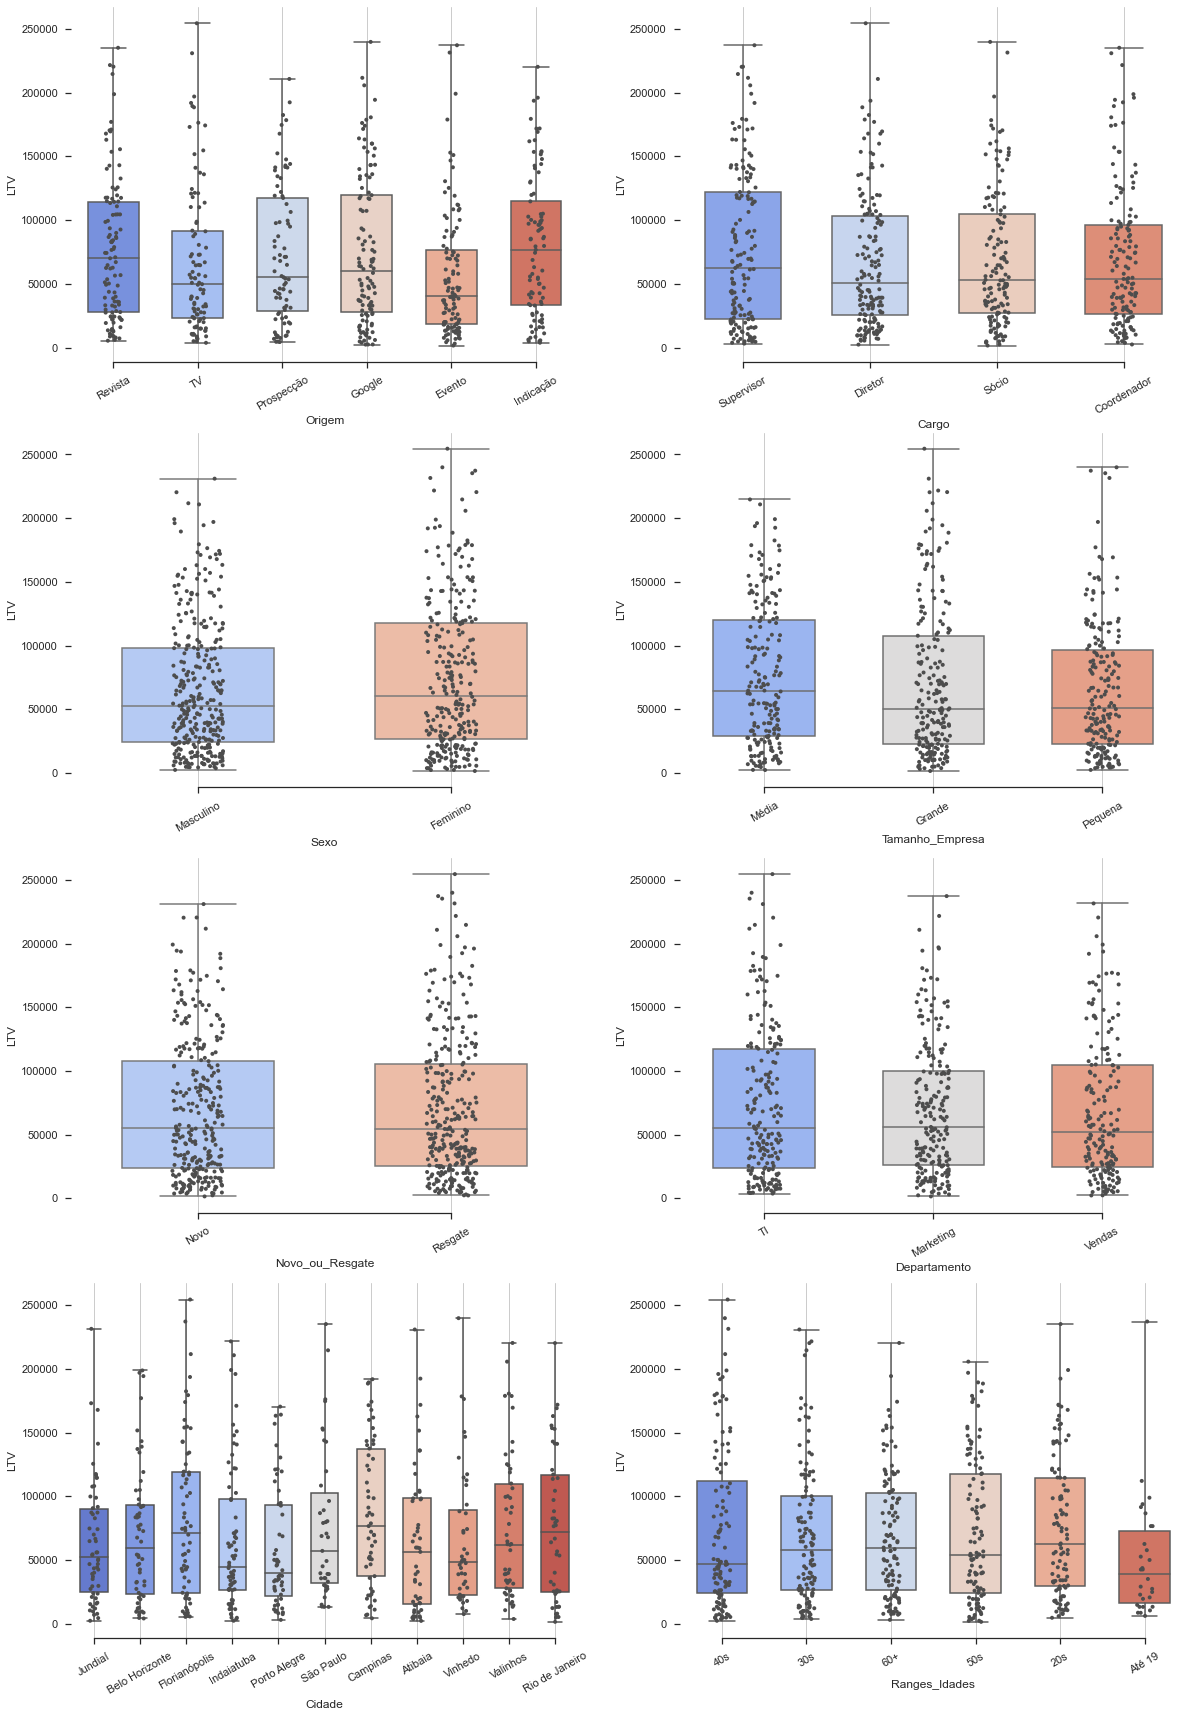

In [1130]:
fig = plt.figure(figsize=(20, 30))
cores_geral = "coolwarm"

ax1 = fig.add_subplot(421)
sns.boxplot(x="Origem", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Origem", y="LTV", data=df, size=4, color=".3", linewidth=0)
ax1.xaxis.grid(True)
plt.xticks(rotation=30)
ax1.set(ylabel="LTV")

ax2 = fig.add_subplot(422)
sns.boxplot(x="Cargo", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Cargo", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax2.xaxis.grid(True)
ax2.set(ylabel="LTV")

ax3 = fig.add_subplot(423)
sns.boxplot(x="Sexo", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Sexo", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax3.xaxis.grid(True)
ax3.set(ylabel="LTV")

ax4 = fig.add_subplot(424)
sns.boxplot(x="Tamanho_Empresa", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Tamanho_Empresa", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax4.xaxis.grid(True)
ax4.set(ylabel="LTV")
               
ax5 = fig.add_subplot(425)
sns.boxplot(x="Novo_ou_Resgate", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Novo_ou_Resgate", y="LTV", data=df,size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax5.xaxis.grid(True)
ax5.set(ylabel="LTV")

ax6 = fig.add_subplot(426)
sns.boxplot(x="Departamento", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Departamento", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax6.xaxis.grid(True)
ax6.set(ylabel="LTV")

ax7 = fig.add_subplot(427)
sns.boxplot(x="Cidade", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Cidade", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax7.xaxis.grid(True)
ax7.set(ylabel="LTV")

ax8 = fig.add_subplot(428)
sns.boxplot(x="Ranges_Idades", y="LTV", data=df, whis=[0, 100], width=.6, palette=cores_geral)
sns.stripplot(x="Ranges_Idades", y="LTV", data=df, size=4, color=".3", linewidth=0)
plt.xticks(rotation=30)
ax8.xaxis.grid(True)
ax8.set(ylabel="LTV")

sns.despine(trim=True, left=True)

## Médias de LTV em variáveis

In [1131]:
media_origem = df.groupby('Origem')['LTV'].mean()
media_idades = df.groupby('Ranges_Idades')['LTV'].mean()
media_cargo = df.groupby('Cargo')['LTV'].mean()
media_sexo = df.groupby('Sexo')['LTV'].mean()
media_cidade = df.groupby('Cidade')['LTV'].mean()
media_tamanho = df.groupby('Tamanho_Empresa')['LTV'].mean()
media_novo = df.groupby('Novo_ou_Resgate')['LTV'].mean()
media_departamento = df.groupby('Departamento')['LTV'].mean()
print('Médias de LTV em principais variáveis:')
espacador()
print(media_origem)
espacador()
print(media_idades)
espacador()
print(media_cidade)
espacador()
print(media_cargo)
espacador()
print(media_sexo)
espacador()
print(media_tamanho)
espacador()
print(media_novo)
espacador()
print(media_departamento)
espacador()

Médias de LTV em principais variáveis:
------------------------------------------------------------------------------------------
Origem
Evento       55573.12027295
Google       74634.54234930
Indicação    79220.86021646
Prospecção   72770.46006435
Revista      76665.82089749
TV           66329.36988738
Name: LTV, dtype: float64
------------------------------------------------------------------------------------------
Ranges_Idades
20s      75632.84549473
30s      69702.08736206
40s      73040.50901450
50s      72123.37289221
60+      68309.96665497
Até 19   49860.91227412
Name: LTV, dtype: float64
------------------------------------------------------------------------------------------
Cidade
Atibaia          63246.48409577
Belo Horizonte   68900.59901982
Campinas         85702.88940101
Florianópolis    81231.22926776
Indaiatuba       65322.97011430
Jundiaí          62903.08730602
Porto Alegre     57711.88047065
Rio de Janeiro   75463.75898867
São Paulo        76176.50466990
Valinhos

### Melhores médias de LTV em features no geral:
<ul>
    <li>Origem: <strong>Indicação</strong></li>
    <li>Range de idades: <strong>20-29 anos</strong></li>
    <li>Cargo: <strong>Supervisor</strong></li>
    <li>Sexo: <strong>Feminino</strong></li>
    <li>Tamanho da empresa: <strong>Média</strong></li>
    <li>Novo ou Resgate: <strong>Resgate</strong></li>
    <li>Cidade: <strong>Campinas</strong></li>
    <li>Departamento: <strong>TI</strong></li>
</ul>

## Quantidade de itens em features categóricas

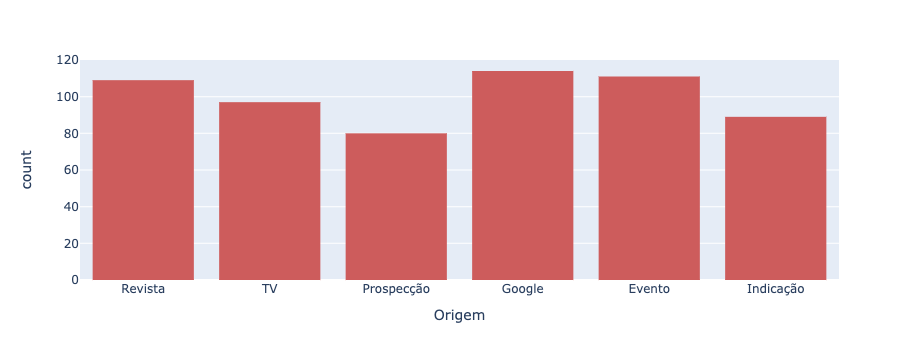

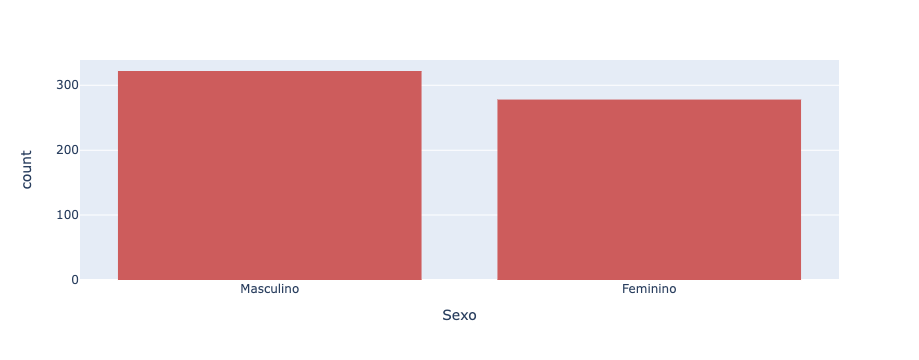

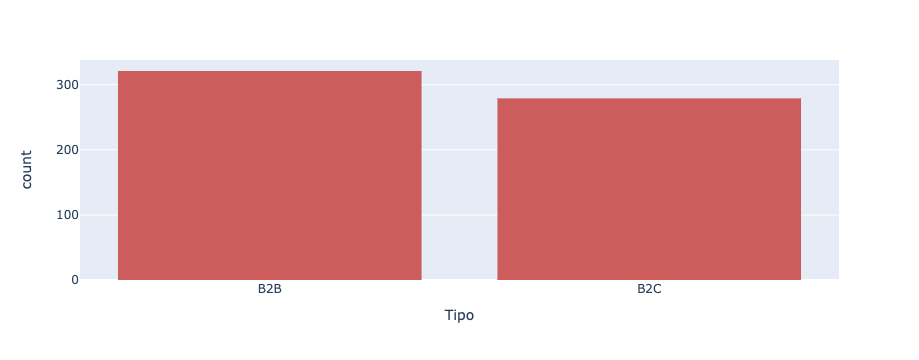

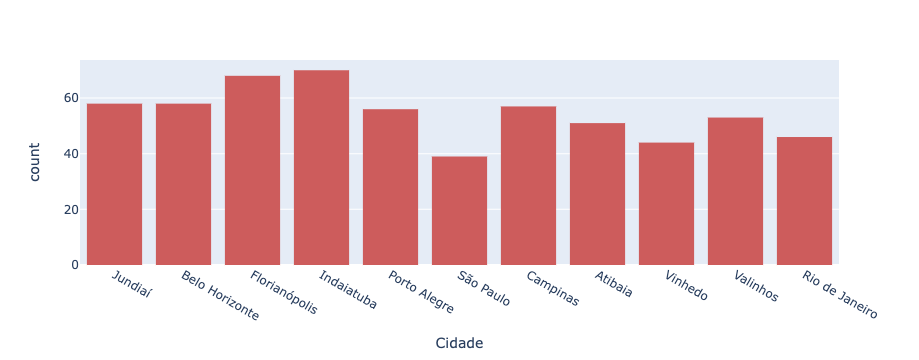

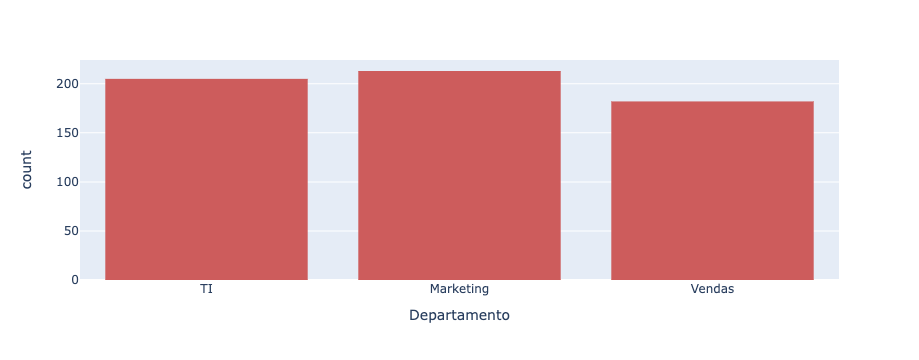

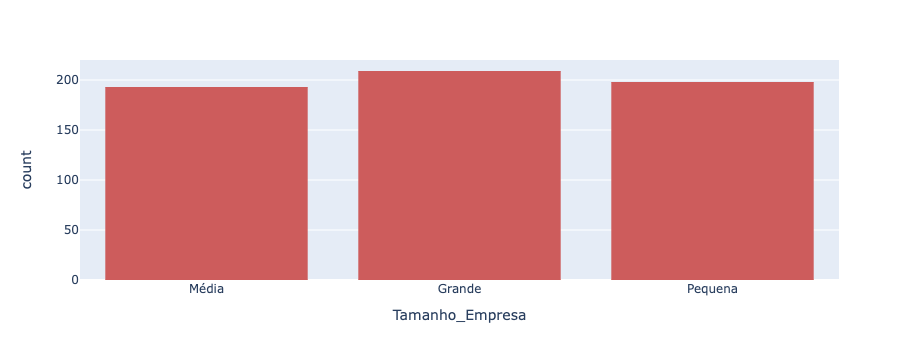

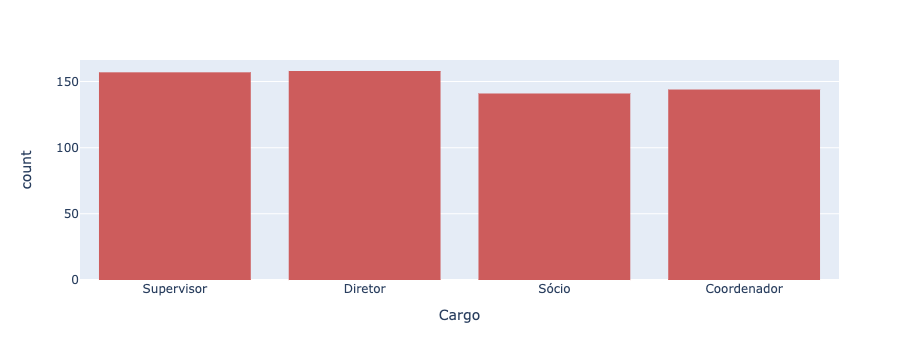

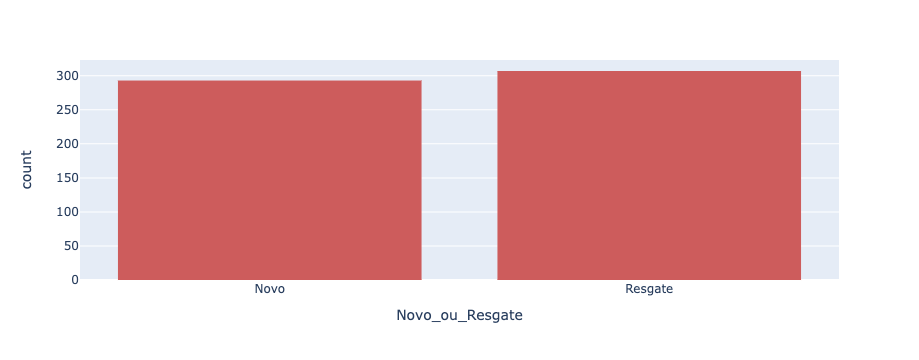

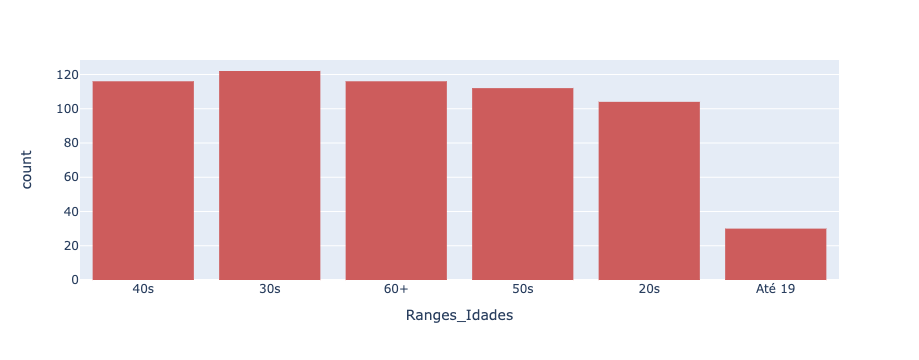

In [1132]:
import plotly.graph_objects as go
import plotly.express as px
df_categorico = df.select_dtypes(include = 'object').columns

for i in df_categorico:
    fig = px.histogram(df, x = i,  color_discrete_sequence=['indianred'])
    fig.show()

## Quantidade de itens em features não-categóricas

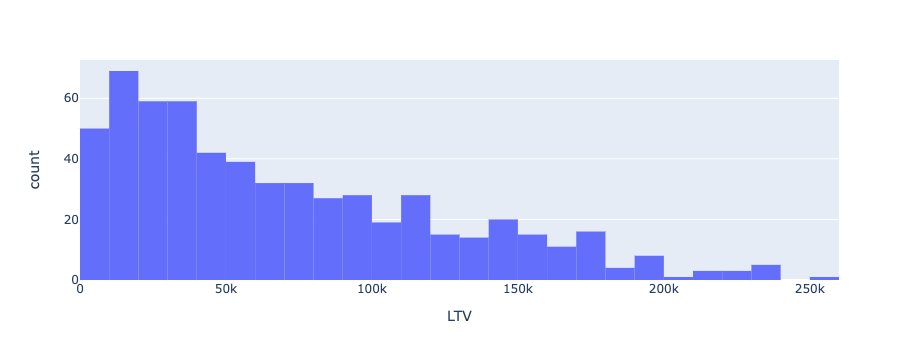

In [1133]:
df_numerico = df.select_dtypes(exclude = 'object').columns

for i in df_numerico:
    fig = px.histogram(df, x = i)
    fig.show()

In [1134]:
from sklearn.cluster import KMeans
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
print("Variáveis categóricas:", object_cols)

Variáveis categóricas: ['Origem', 'Sexo', 'Tipo', 'Cidade', 'Departamento', 'Tamanho_Empresa', 'Cargo', 'Novo_ou_Resgate', 'Ranges_Idades']


In [1135]:
df.head()

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades
0,Revista,Masculino,B2B,Jundiaí,TI,Média,Supervisor,Novo,125603.13471233,40s
1,Revista,Feminino,B2B,Jundiaí,Marketing,Grande,Supervisor,Novo,116753.16966390,30s
2,TV,Feminino,B2C,Belo Horizonte,TI,Pequena,Diretor,Novo,151797.25947285,60+
3,Revista,Feminino,B2B,Florianópolis,Marketing,Média,Diretor,Resgate,28658.39815840,50s
4,Prospecção,Masculino,B2C,Indaiatuba,Marketing,Média,Sócio,Novo,71131.60161962,50s


#### Label Encoding de features objeto

In [1136]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [1137]:
df.head()

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades
0,4,1,0,5,1,1,2,0,125603.13471233,2
1,4,0,0,5,0,0,2,0,116753.16966390,1
2,5,0,1,1,1,2,1,0,151797.25947285,4
3,4,0,0,3,0,1,1,1,28658.39815840,3
4,3,1,1,4,0,1,3,0,71131.60161962,3


Scaler

In [1138]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )

### Redução de componentes

In [1139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,600.00000000,0.00000000,1.08574929,-2.29313194,-0.81721346,-0.00170659,0.82044917,2.93325344
col2,600.00000000,0.00000000,1.07964039,-2.70792261,-0.79748196,0.03125990,0.76270838,3.09268480
col3,600.00000000,-0.00000000,1.05902228,-2.78940687,-0.72979080,-0.00277982,0.70474620,2.92400441


In [1140]:
scaled_ds.head()

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades
0,0.90121389,0.92916847,-0.93228691,0.09151116,0.06380722,0.02226524,0.46405615,-1.02361202,0.99402550,-0.11487793
1,0.90121389,-1.07623110,-0.93228691,0.09151116,-1.17117120,-1.19220266,0.46405615,-1.02361202,0.83418549,-0.77763522
2,1.47220474,-1.07623110,1.07263117,-1.22361932,0.06380722,1.23673315,-0.44884119,-1.02361202,1.46711995,1.21063665
3,0.90121389,-1.07623110,-0.93228691,-0.56605408,-1.17117120,0.02226524,-0.44884119,0.97693265,-0.75690212,0.54787936
4,0.33022304,0.92916847,1.07263117,-0.23727146,-1.17117120,0.02226524,1.37695349,-1.02361202,0.01021024,0.54787936


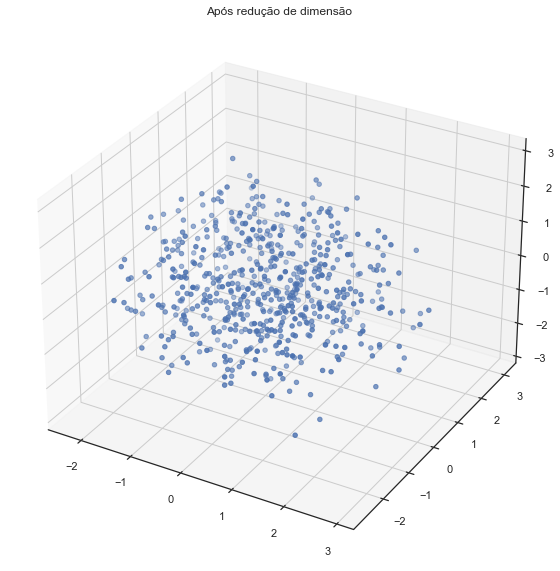

In [1141]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Após redução de dimensão")
plt.show()

#### Utilizando elbow para descobrir quantidade ideal de clusters

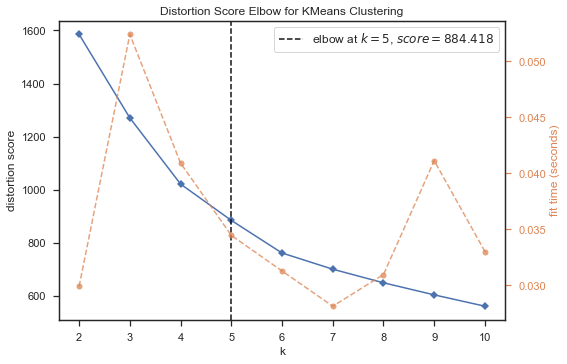

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1142]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Observação: Melhor elbow de 5

In [1143]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

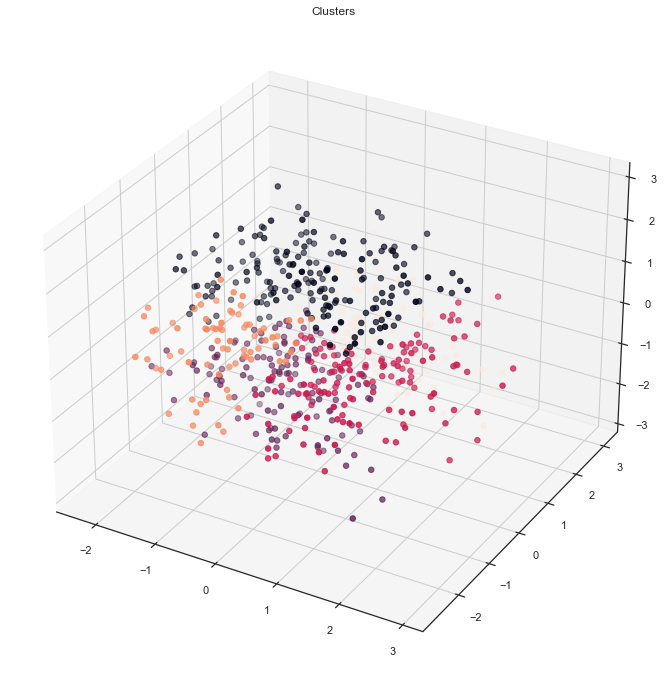

In [1144]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, projection='3d',)
ax.scatter(x, y, z, s=30, c=PCA_ds["Clusters"], marker='o', )
ax.set_title("Clusters")
plt.show()

In [1145]:
df.groupby('Clusters').mean()

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades
Clusters,,,,,,,,,,
0,2.57458564,0.66298343,0.75138122,5.18232044,1.52486188,1.24861878,1.40331492,0.59116022,58831.41095716,1.35911602
1,2.63492063,0.68253968,0.13492063,4.47619048,0.42063492,0.95238095,2.02380952,0.39682540,69059.23702667,3.07936508
2,1.94244604,0.12230216,0.46762590,4.17266187,0.73381295,0.54676259,0.97841727,0.53956835,87459.56918862,2.30215827
3,1.21333333,0.73333333,0.58666667,3.49333333,0.64000000,1.57333333,1.13333333,0.81333333,37698.88168082,3.06666667
4,3.72151899,0.55696203,0.21518987,6.18987342,1.13924051,0.62025316,2.08860759,0.17721519,101335.76465249,1.51898734


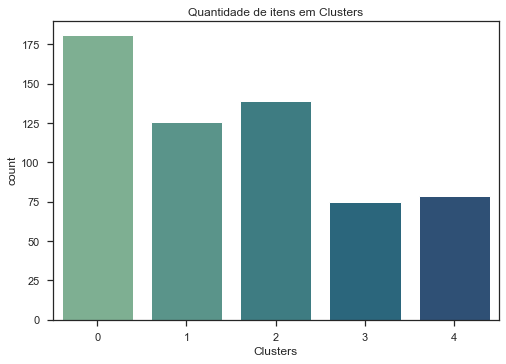

In [1146]:
pl = sns.countplot(x=df["Clusters"], palette= "crest")
pl.set_title("Quantidade de itens em Clusters")
plt.show()

In [1147]:
df.head()

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades,Clusters
0,4,1,0,5,1,1,2,0,125603.13471233,2,4
1,4,0,0,5,0,0,2,0,116753.16966390,1,4
2,5,0,1,1,1,2,1,0,151797.25947285,4,2
3,4,0,0,3,0,1,1,1,28658.39815840,3,2
4,3,1,1,4,0,1,3,0,71131.60161962,3,1


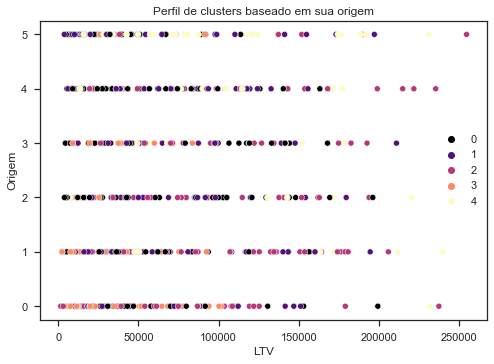

In [1148]:
pl = sns.scatterplot(data = df,x=df["LTV"], y=df["Origem"],hue=df["Clusters"], palette="magma")
pl.set_title("Perfil de clusters baseado em sua origem")
plt.legend()
plt.show()

## Visualização de variáveis por cluster

<Figure size 576x396 with 0 Axes>

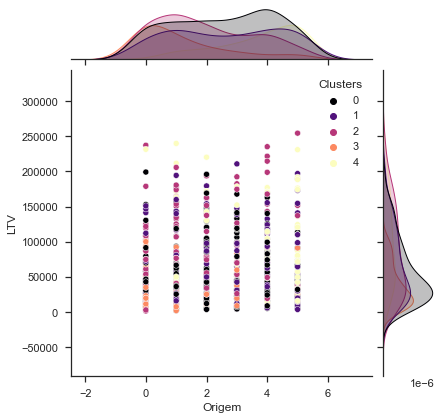

<Figure size 576x396 with 0 Axes>

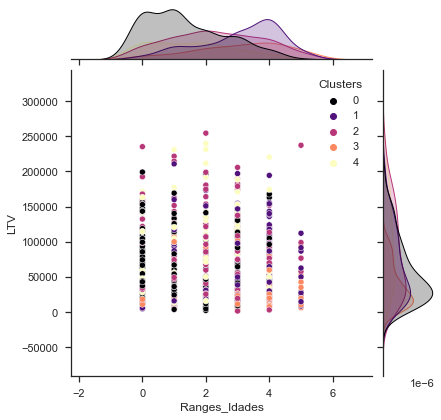

<Figure size 576x396 with 0 Axes>

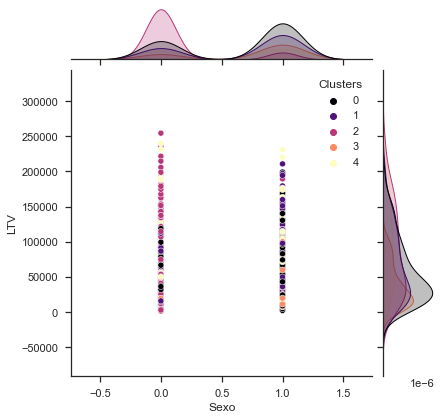

<Figure size 576x396 with 0 Axes>

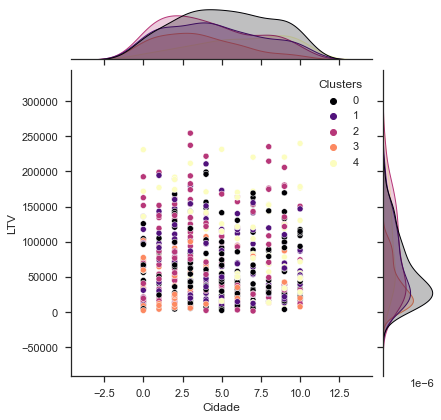

<Figure size 576x396 with 0 Axes>

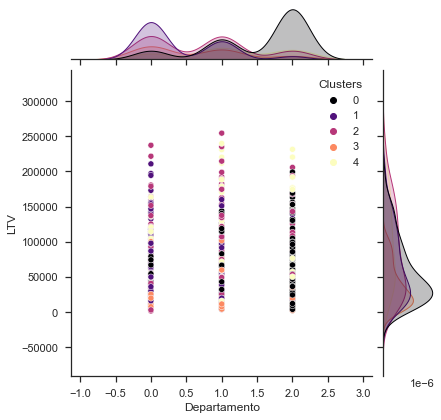

<Figure size 576x396 with 0 Axes>

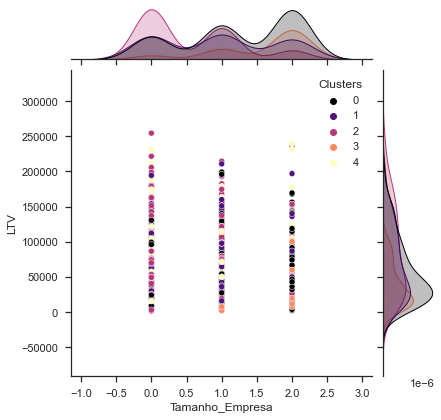

<Figure size 576x396 with 0 Axes>

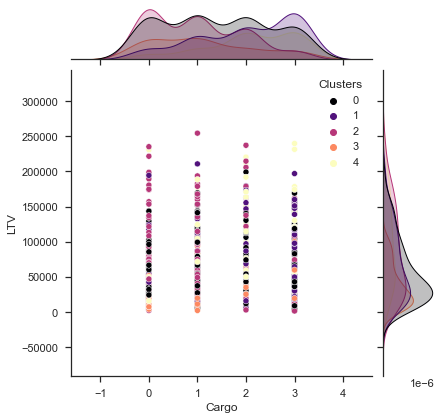

<Figure size 576x396 with 0 Axes>

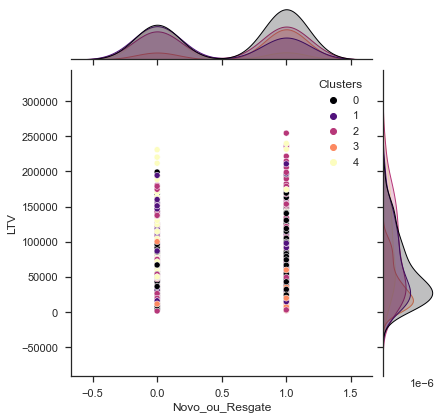

In [1149]:
variaveis = [ "Origem","Ranges_Idades","Sexo", "Cidade", "Departamento", "Tamanho_Empresa", "Cargo", "Novo_ou_Resgate"]

contv = 0

for variavel in variaveis:
    contv +=1
    plt.figure()
    sns.jointplot(x=df[variavel], y=df["LTV"], hue=df["Clusters"], kind="scatter", palette = "magma")
    plt.show()

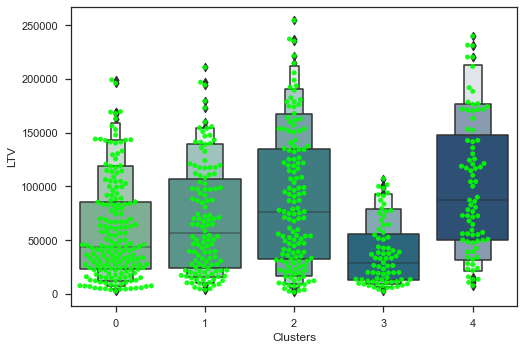

In [1150]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["LTV"], color= "#0f0", alpha=0.9)
pl=sns.boxenplot(x=df["Clusters"], y=df["LTV"], palette="crest")
plt.show()

In [1151]:
espacador()
cluster0 = df.loc[df['Clusters'] == 0]
print('LTV médio do Cluster 0: {}.'.format(cluster0['LTV'].mean()))   
cluster1 = df.loc[df['Clusters'] == 1]
print('LTV médio do Cluster 1: {}.'.format(cluster1['LTV'].mean()))
cluster2 = df.loc[df['Clusters'] == 2]
print('LTV médio do Cluster 2: {}.'.format(cluster2['LTV'].mean()))
cluster3 = df.loc[df['Clusters'] == 3]
print('LTV médio do Cluster 3: {}.'.format(cluster3['LTV'].mean()))
cluster4 = df.loc[df['Clusters'] == 4]
print('LTV médio do Cluster 4: {}.'.format(cluster4['LTV'].mean()))
cluster0.head()
espacador()

------------------------------------------------------------------------------------------
LTV médio do Cluster 0: 58831.41095716042.
LTV médio do Cluster 1: 69059.23702667427.
LTV médio do Cluster 2: 87459.56918861694.
LTV médio do Cluster 3: 37698.88168081616.
LTV médio do Cluster 4: 101335.76465248904.
------------------------------------------------------------------------------------------


Show, após o gráfico e os valores de médias, descobrimos que o Cluster 4 é o que gera em média mais receita para a empresa, vamos explorar agora suas variáveis para entender quem são as pessoas desse grupo.

## Visualização de variáveis do Cluster 4

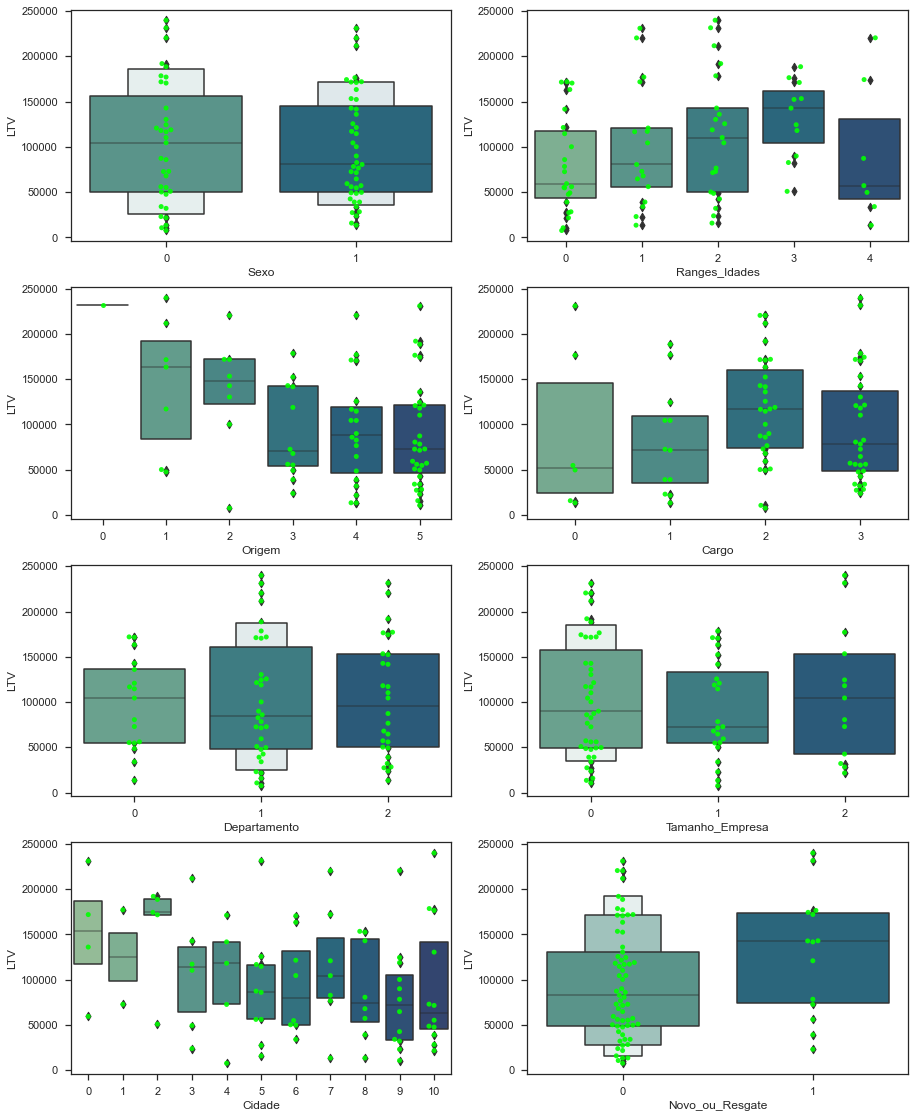

In [1152]:
fig = plt.figure(figsize=(15, 40))

cor="#0f0"

cores_chart_cluster = "crest"

fig.add_subplot(821)
sns.swarmplot(x=cluster4["Sexo"], y=cluster4["LTV"], color= cor, alpha=0.9 )
sns.boxenplot(x=cluster4["Sexo"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(822)
pl=sns.stripplot(x=cluster4["Ranges_Idades"], y=cluster4["LTV"], color= cor, alpha=0.9 )
pl=sns.boxenplot(x=cluster4["Ranges_Idades"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(823)
pl=sns.swarmplot(x=cluster4["Origem"], y=cluster4["LTV"], color= cor, alpha=0.9 )
pl=sns.boxenplot(x=cluster4["Origem"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(824)
pl=sns.swarmplot(x=cluster4["Cargo"], y=cluster4["LTV"], color= cor, alpha=0.9)
pl=sns.boxenplot(x=cluster4["Cargo"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(825)
pl=sns.swarmplot(x=cluster4["Departamento"], y=cluster4["LTV"], color= cor, alpha=0.9 )
pl=sns.boxenplot(x=cluster4["Departamento"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(826)
pl=sns.swarmplot(x=cluster4["Tamanho_Empresa"], y=cluster4["LTV"], color= cor, alpha=0.9 )
pl=sns.boxenplot(x=cluster4["Tamanho_Empresa"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(827)
pl=sns.swarmplot(x=cluster4["Cidade"], y=cluster4["LTV"], color= cor, alpha=0.9 )
pl=sns.boxenplot(x=cluster4["Cidade"], y=cluster4["LTV"], palette=cores_chart_cluster)

fig.add_subplot(828)
pl=sns.swarmplot(x=cluster4["Novo_ou_Resgate"], y=cluster4["LTV"], color= cor, alpha=0.9)
pl=sns.boxenplot(x=cluster4["Novo_ou_Resgate"], y=cluster4["LTV"], palette=cores_chart_cluster)

plt.show()

In [1153]:
%%html
<style>
table.profiling{
  width: 100%;
  background-color: #f0f0f0;
  border-collapse: collapse;
  border-width: 1px;
  border-color: #242424;
  border-style: solid;
  color: #000000;
}

table.profiling td, table.profiling th {
  border-width: 1px;
  border-color: #242424;
  border-style: solid;
  padding: 3px;
    text-align: center;
}
table.profiling thead {
  background-color: #2B667C;
  color:#fff
}
h2.centralizado{ text-align: center;}
</style>

<h2 class=centralizado>Referência de termos para Profiling<h2>
<table class=profiling>
  <thead>
    <tr>
		<th>Origem</th>
		<th>Range de idade</th>
        <th>Sexo</th>
		<th>Tipo</th>
		<th>Cidade</th>
        <th>Cargo</th>
		<th>Departamento</th>
		<th>Tamanho da empresa</th>
		<th>Novo ou Resgate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
		<td>0: Evento</td>
        <td>0: 20s</td>
		<td>0: Feminino</td>
		<td>0: B2B</td>
		<td>0: Atibaia</td>
        <td>0: Coordenador</td>
		<td>0: Marketing</td>
		<td>0: Grande</td>
		<td>0: Novo</td>
    </tr>
    <tr>
		<td>1: Google</td>
   		<td>1: 30s</td>     
		<td>1: Masculino</td>
		<td>1: B2C</td>
		<td>1: Belo Horizonte</td>
        <td>1: Diretor</td>
		<td>1: TI</td>
        <td>1: Média</td>
		<td>1: Resgate</td>
    </tr>
    <tr>
		<td>2: Indicação</td>
        <td>2: 40s</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>2: Campinas</td>
        <td>2: Supervisor</td>
        <td>2: Vendas</td>
		<td>2: Pequena</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>3: Prospecção</td>
        <td>3: 50s</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>3: Florianópolis</td>
        <td>3: Sócio</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>4: Revista</td>
        <td>4: 60+</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>4: Indaiatuba</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>        
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>5: TV</td>
        <td>5: Até 19</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>5: Jundiaí</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>&nbsp;</td>
        <td></td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>6: Porto Alegre</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>7: Rio de Janeiro</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>&nbsp;</td>
		<td>&nbsp;</td>        
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>8: São Paulo</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>9: Valinhos</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
		<td>&nbsp;</td>
    </tr>
    <tr>
		<td>&nbsp;</td>
		<td>&nbsp;</td>        
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>10: Vinhedo</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
  </tbody>
</table>

## Profiling
### Após essa quantidade imensa de informações, conseguimos entender cada Cluster e principalmente o número 4, que tem maior média de LTV:
#### Clientes do Cluster 4:
<ol>
    <li>São do sexo <strong>masculino</strong>;</li>
    <li>Estão na faixa estária dos <strong>20 anos</strong> (Porém, os valores estão distribuídos de maneira similar nas faixas de 30 e 40 anos);</li>
    <li>São leads oriundos de campanhas de <strong>TV</strong>;</li>
    <li>Estão no cargo de <strong>Supervisor</strong>;</li>
    <li>Trabalham no departamento de <strong>TI</strong>;</li>
    <li>São de <strong>Grandes</strong> empresas;</li>
    <li>Empresas na cidade de <strong>Valinhos</strong>;</li>
    <li>São <strong>Novos</strong> leads.</li>
</ol>
<hr>

## Tratando novo df para download

### Conversão de tipos de colunas para objeto:

In [1154]:
df['Origem'] = df['Origem'].astype(str)
df['Sexo'] = df['Sexo'].astype(str)
df['Tipo'] = df['Tipo'].astype(str)
df['Cidade'] = df['Cidade'].astype(str)
df['Departamento'] = df['Departamento'].astype(str)
df['Tamanho_Empresa'] = df['Tamanho_Empresa'].astype(str)
df['Cargo'] = df['Cargo'].astype(str)
df['Novo_ou_Resgate'] = df['Novo_ou_Resgate'].astype(str)
df['Ranges_Idades'] = df['Ranges_Idades'].astype(str)
df['Clusters'] = df['Clusters'].astype(str)

### Replace de dados para exportação e facilitação do entendimento:

In [1155]:
df['Origem'] = df['Origem'].replace(str(0),'Evento')
df['Origem'] = df['Origem'].replace(str(1),'Google')
df['Origem'] = df['Origem'].replace(str(2),'Indicação')
df['Origem'] = df['Origem'].replace(str(3),'Prospecção')
df['Origem'] = df['Origem'].replace(str(4),'Revista')
df['Origem'] = df['Origem'].replace(str(5),'TV')
df['Sexo'] = df['Sexo'].replace(str(0),'Feminino')
df['Sexo'] = df['Sexo'].replace(str(1),'Masculino')
df['Tipo'] = df['Tipo'].replace(str(0),'B2B')
df['Tipo'] = df['Tipo'].replace(str(1),'B2C')
df['Cidade'] = df['Cidade'].replace(str(0),'Atibaia')
df['Cidade'] = df['Cidade'].replace(str(1),'Belo Horizonte')
df['Cidade'] = df['Cidade'].replace(str(2),'Campinas')
df['Cidade'] = df['Cidade'].replace(str(3),'Florianópolis')
df['Cidade'] = df['Cidade'].replace(str(4),'Indaiatuba')
df['Cidade'] = df['Cidade'].replace(str(5),'Jundiaí')
df['Cidade'] = df['Cidade'].replace(str(6),'Porto Alegre')
df['Cidade'] = df['Cidade'].replace(str(7),'Rio de Janeiro')
df['Cidade'] = df['Cidade'].replace(str(8),'São Paulo')
df['Cidade'] = df['Cidade'].replace(str(9),'Valinhos')
df['Cidade'] = df['Cidade'].replace(str(10),'Vinhedo')
df['Departamento'] = df['Departamento'].replace(str(0),'Marketing')
df['Departamento'] = df['Departamento'].replace(str(1),'TI')
df['Departamento'] = df['Departamento'].replace(str(2),'Vendas')
df['Tamanho_Empresa'] = df['Tamanho_Empresa'].replace(str(0),'Grande')
df['Tamanho_Empresa'] = df['Tamanho_Empresa'].replace(str(1),'Média')
df['Tamanho_Empresa'] = df['Tamanho_Empresa'].replace(str(2),'Pequena')
df['Novo_ou_Resgate'] = df['Novo_ou_Resgate'].replace(str(0),'Novo')
df['Novo_ou_Resgate'] = df['Novo_ou_Resgate'].replace(str(1),'Resgate')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(0),'20s')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(1),'30s')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(2),'40s')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(3),'50s')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(4),'60s')
df['Ranges_Idades'] = df['Ranges_Idades'].replace(str(5),'Até 19')
df['Clusters'] = df['Clusters'].replace(str(0),'Intermediário')
df['Clusters'] = df['Clusters'].replace(str(1),'Intermediário')
df['Clusters'] = df['Clusters'].replace(str(2),'Intermediário')
df['Clusters'] = df['Clusters'].replace(str(3),'Pior')
df['Clusters'] = df['Clusters'].replace(str(4),'Melhor')


### Dataframe atualizado

In [1158]:
df.head(10)

,Origem,Sexo,Tipo,Cidade,Departamento,Tamanho_Empresa,Cargo,Novo_ou_Resgate,LTV,Ranges_Idades,Clusters
0,Revista,Masculino,B2B,Jundiaí,TI,Média,2,Novo,125603.13471233,40s,Melhor
1,Revista,Feminino,B2B,Jundiaí,Marketing,Grande,2,Novo,116753.16966390,30s,Melhor
2,TV,Feminino,B2C,Belo Horizonte,TI,Pequena,1,Novo,151797.25947285,60s,Intermediário
3,Revista,Feminino,B2B,Florianópolis,Marketing,Média,1,Resgate,28658.39815840,50s,Intermediário
4,Prospecção,Masculino,B2C,Indaiatuba,Marketing,Média,3,Novo,71131.60161962,50s,Intermediário
5,Prospecção,Feminino,B2B,Porto Alegre,TI,Média,1,Resgate,9568.77335706,60s,Intermediário
6,Google,Feminino,B2B,Indaiatuba,TI,Pequena,3,Resgate,36790.40678563,40s,Pior
7,Google,Feminino,B2C,São Paulo,Vendas,Grande,2,Resgate,176261.58262947,40s,Intermediário
8,Google,Feminino,B2C,São Paulo,Marketing,Grande,2,Novo,30390.69630657,40s,Intermediário
9,Prospecção,Masculino,B2B,Campinas,TI,Pequena,3,Novo,4349.22496018,40s,Intermediário


### Download do novo CSV

In [1156]:
df.to_csv('dados-clusters.csv')

<img src="ty.gif" width="100%"/>